In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from collections import Counter

# Due to Darkmode of Jupyter Notebook
plt.style.use('dark_background')
mpl.rcParams["figure.facecolor"] = '1c2021'
mpl.rcParams["axes.facecolor"] = '1c2021'


In [118]:
#Read csv
data_2014 = pd.read_csv("1-Data/OSMI 2014 Mental Health in Tech Survey Results - OSMI Mental Health in Tech Survey 2019.csv")
data_2014.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [119]:
#cleaning data
#M =
data_2014_clean=data_2014.iloc[:,[1,2,3,7,9,10,11,12,13,14,18]]

In [120]:
data_2014_clean.head()

,Age,Gender,Country,treatment,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,mental_health_consequence
0,37,Female,United States,Yes,6-25,No,Yes,Yes,Not sure,No,No
1,44,M,United States,No,More than 1000,No,No,Don't know,No,Don't know,Maybe
2,32,Male,Canada,No,6-25,No,Yes,No,No,No,No
3,31,Male,United Kingdom,Yes,26-100,No,Yes,No,Yes,No,Yes
4,31,Male,United States,No,100-500,Yes,Yes,Yes,No,Don't know,No


### Data Pre-Processing for Gender Analysis

In [121]:
# Number Unique Values in the Column
data_2014_clean["Gender"].nunique()

49

In [122]:
# Different Values in Column
data_2014_clean["Gender"].unique()

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [123]:
# Cleaning and Reducing Categories

# Difine Dict with the key-value pair to remap.
conv = {'male':'Male','M':'Male','m':'Male','Make':'Male','Man':'Male','Malr':'Male',
        'Male (CIS)':'Male','Male ':'Male','Cis Male':'Male','Mail':'Male',
        'Cis Male':'Male','cis male':'Male','msle':'Male','Cis Man':'Male',
        'maile':'Male','Mal':'Male',
        'female':'Female','F':'Female','f':'Female','Woman':'Female',
        'Femake':'Female','Female ':'Female','femail':'Female', 
        'Female (cis)':'Female','woman':'Female','cis-female/femme':'Female',
        'Cis Female':'Female',
        'Female (trans)':'Others','Androgyne':'Others','queer':'Others','Neuter':'Others',
        'Trans woman':'Others','fluid':'Others','non-binary':'Others','queer/she/they':'Others',
        'Enby':'Others','Trans-female':'Female','Genderqueer':'Others',
        'Agender':'Others','something kinda male?':'Others',
        'Male-ish':'Others','ostensibly male, unsure what that really means':'Others',
        'Nah':'Others','Guy (-ish) ^_^':'Others',
        'male leaning androgynous':'Others','A little about you':'Others', 'p': 'Others', 'All': 'Others'}
data_2014_clean=data_2014_clean.replace({"Gender": conv})

data_2014_clean["Gender"].unique()

array(['Female', 'Male', 'Others'], dtype=object)

### Data Analysis

In [124]:
# Gender Value Counts
data_2014_clean.Gender.value_counts()

Male      990
Female    248
Others     21
Name: Gender, dtype: int64

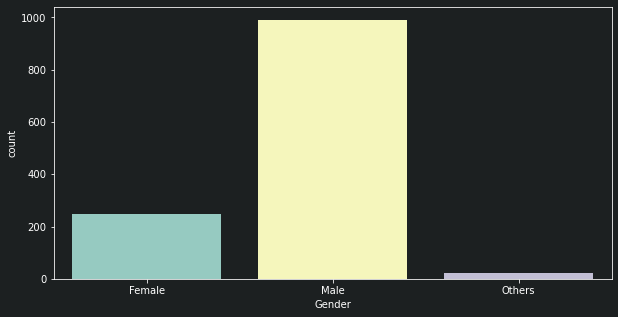

In [134]:
# Visualising Genders based on Data
plt.figure(figsize=(10,5))
sns.countplot(x=data_2014_clean['Gender'])
#plt.title('Count plot of Gender',fontsize=13)
plt.show()

##### Columns Currently in DF

In [126]:
data_2014_clean.columns

Index(['Age', 'Gender', 'Country', 'treatment', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'mental_health_consequence'],
      dtype='object')

##### Tech and Non-Tech Companies and Relationship towards Wellness Programs

In [127]:
data_2014_clean.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

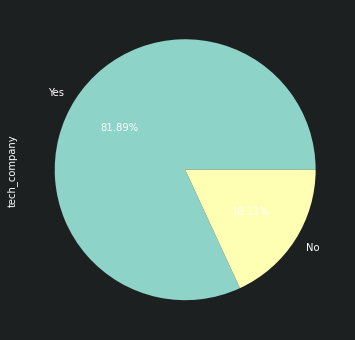

In [128]:
# Visualising Non-Tech to Tech Companies
plt.figure(figsize=(10,6))
data_2014_clean.tech_company.value_counts().plot(kind='pie',autopct='%0.2f%%')
#plt.title('Type of Company',fontsize=18)
plt.show()

In [129]:
# Wellness Programs being offered
data_2014_clean.wellness_program.value_counts()

No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64

##### Company Type and if they offer Wellness program

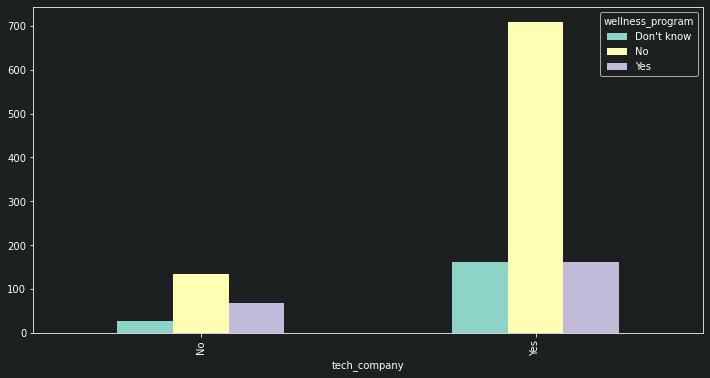

In [130]:
pd.crosstab(data_2014_clean['tech_company'], data_2014_clean['wellness_program']).plot(kind='bar',figsize=(12,6))
#plt.title('Company Type & If They Offer Wellness Programs',fontsize=18)
plt.show()


#### Analysing Gender: Spot Trends

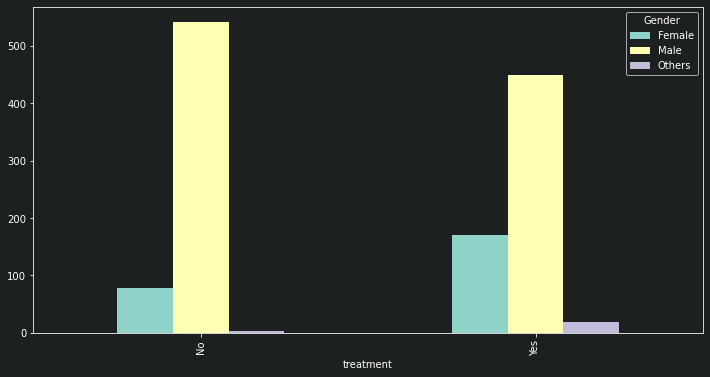

In [138]:
# Look at Gender and Treatement Columns and Plot 
pd.crosstab(data_2014_clean['treatment'],data_2014_clean['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()


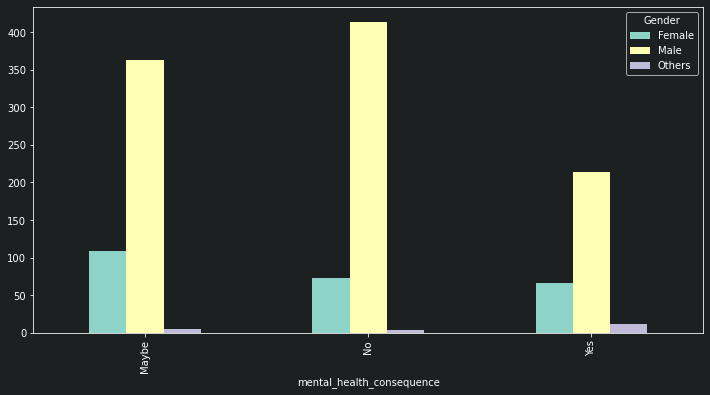

In [143]:
# Gender Vs Mental Health Consequence
pd.crosstab(data_2014_clean['mental_health_consequence'],data_2014_clean['Gender']).plot(kind='bar',figsize=(12,6))
plt.show()